(array([ 0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
         0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
         0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 15 Patch objects>)

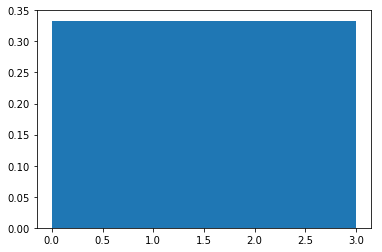

In [20]:
x = np.linspace(.05, 2.95, 30)
bins = np.linspace(0, 3, 16)

plt.hist(x, bins, normed=True)

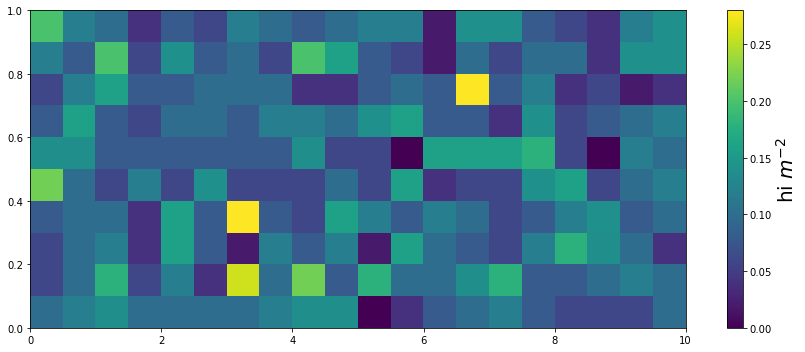

In [23]:
%matplotlib inline
from __future__ import division, print_function
import matplotlib.pyplot as plt
import numpy as np

x, y = np.random.uniform((0, 0), (10, 1), (1000, 2)).T

bins_x = np.linspace(0, 10, 21)
bins_y = np.linspace(0, 1, 11)

fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)

im = ax.hist2d(x, y, [bins_x, bins_y], normed=True)[3]

cb = plt.colorbar(im, ax=ax)
cb.ax.set_ylabel(r'hi $m^{-2}$', fontsize=20)

['_A',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_solids',
 '_boundaries',
 '_central_N',
 '_config_axes',
 '_edges',
 '_extend_lower',
 '_extend_upper',
 '_extended_N',
 '_find_range',
 '_get_extension_lengths',
 '_inside',
 '_label',
 '_labelkw',
 '_locate',
 '_mesh',
 '_outline',
 '_patch_ax',
 '_process_values',
 '_proportional_y',
 '_set_label',
 '_slice_dict',
 '_ticker',
 '_uniform_y',
 '_values',
 '_y',
 'add_checker',
 'add_lines',
 'alpha',
 'autoscale',
 'autoscale_None',
 'ax',
 'boundaries',
 'callbacksSM',
 'changed',
 'check_update',
 'cmap',
 'colorbar',
 'config_axis',
 'dividers',
 'draw_all',
 'drawedges',
 'extend',
 'extendfrac',
 'extendrect',
 'filled',
 'formatter',
 'get_array',
 'get_clim',
 'get_cmap',
 'lines',
 'locator',
 'map

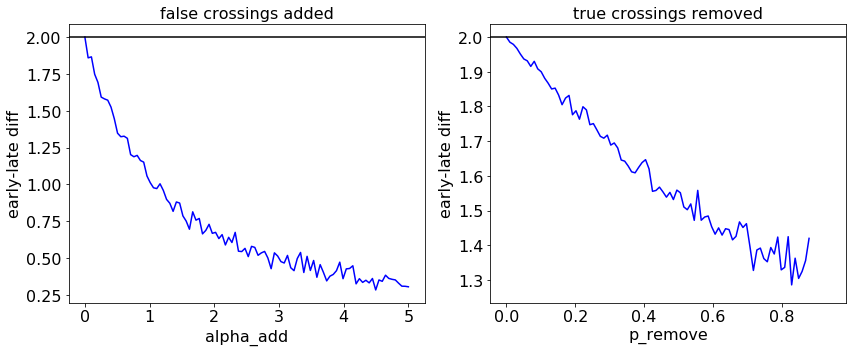

In [54]:
ALPHA = 2.5
MAX_CROSSINGS = 5
MAX_EARLY = 2
Y_EARLY = 3
Y_LATE = 1
N = 1000
ALPHAS_ADD = np.linspace(0, 5, 100)
P_REMOVES = np.linspace(0, 1, 100)

def early_late_diff(trajs):
    """Calculate the early minus late difference for a set of trajectories."""
    ys_early = []
    ys_late = []
    
    for traj in trajs:
        
        # get crossing ordering
        idxs = np.argsort(traj['x'])
        
        # get early vals
        ys_early.extend(list(traj['y'][idxs[:MAX_EARLY]]))
        
        # get late vals
        ys_late.extend(list(traj['y'][idxs[MAX_EARLY:]]))
    
    if (not ys_early) or (not ys_late):
        return np.nan
    
    return np.mean(ys_early) - np.mean(ys_late)
        

# make ideal trajectories
trajs = []

for ctr in range(N):
    # sample number of crossings
    n_crossings = min(np.random.poisson(ALPHA), MAX_CROSSINGS)
    
    # sample crossing times
    x = np.random.rand(n_crossings)
    
    # assign crossing values
    y = Y_LATE * np.ones(len(x))
    y[np.argsort(x)[:MAX_EARLY]] = Y_EARLY
    
    trajs.append({'x': x, 'y': y, 'n': n_crossings})
    
# calculate ideal diff
early_late_diff_ideal = early_late_diff(trajs)

# make trajectories with zero-valued crossings randomly added
early_late_diffs_add = []

for alpha_add in ALPHAS_ADD:
    
    trajs_add = deepcopy(trajs)
    
    for traj in trajs_add:
        n_add = np.random.poisson(alpha_add)
        traj['x'] = cc([traj['x'], np.random.rand(n_add)])
        traj['y'] = cc([traj['y'], np.zeros(n_add)])
        
    early_late_diffs_add.append(early_late_diff(trajs_add))

# make trajectories with crossings randomly removed
early_late_diffs_remove = []

for p_remove in P_REMOVES:
    
    trajs_remove = deepcopy(trajs)
    
    for traj in trajs_remove:
        mask = ~(np.random.rand(traj['n']) < p_remove)
        traj['x'] = traj['x'][mask]
        traj['y'] = traj['y'][mask]
        
    early_late_diffs_remove.append(early_late_diff(trajs_remove))
    
# make figure
fig, axs = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)

# added false crossings
axs[0].plot(ALPHAS_ADD, early_late_diffs_add, color='b')
axs[0].axhline(early_late_diff_ideal, color='k')
axs[0].set_xlabel('alpha_add')
axs[0].set_ylabel('early-late diff')
axs[0].set_title('false crossings added')

# removed true crossings
axs[1].plot(P_REMOVES, early_late_diffs_remove, color='b')
axs[1].axhline(early_late_diff_ideal, color='k')
axs[1].set_xlabel('p_remove')
axs[1].set_ylabel('early-late diff')
axs[1].set_title('true crossings removed')

for ax in axs:
    set_font_size(ax, 16)